<!---
TODO: bench and fit in 1:30
-->

(sympy)=

# Sympy : Symbolic Mathematics in Python

**Author**: _Fabian Pedregosa_

:::{admonition} Objectives

1. Evaluate expressions with arbitrary precision.
2. Perform algebraic manipulations on symbolic expressions.
3. Perform basic calculus tasks (limits, differentiation and
   : integration) with symbolic expressions.
4. Solve polynomial and transcendental equations.
5. Solve some differential equations.
   :::

**What is SymPy?** SymPy is a Python library for symbolic mathematics. It
aims to be an alternative to systems such as Mathematica or Maple while keeping
the code as simple as possible and easily
extensible. SymPy is written entirely in Python and does not require any
external libraries.

Sympy documentation and packages for installation can be found on
<https://www.sympy.org/>

## First Steps with SymPy

### Using SymPy as a calculator

SymPy defines three numerical types: `Real`, `Rational` and `Integer`.

The Rational class represents a rational number as a pair of two
Integers: the numerator and the denominator, so `Rational(1, 2)`
represents 1/2, `Rational(5, 2)` 5/2 and so on:

In [1]:
import sympy as sym
a = sym.Rational(1, 2)

In [2]:
a

1/2

In [3]:
a*2

1

SymPy uses mpmath in the background, which makes it possible to
perform computations using arbitrary-precision arithmetic. That
way, some special constants, like $e$, $pi$, $oo$ (Infinity),
are treated as
symbols and can be evaluated with arbitrary precision:

In [4]:
sym.pi**2

pi**2

In [5]:
sym.pi.evalf()

3.14159265358979

In [6]:
(sym.pi + sym.exp(1)).evalf()

5.85987448204884

as you see, `evalf` evaluates the expression to a floating-point number.

There is also a class representing mathematical infinity, called
`oo`:

In [7]:
sym.oo > 99999

True

In [8]:
sym.oo + 1

oo

::: {exercise-start}
:label: sympy-root2-rational-ex
:class: dropdown
:::

1. Calculate $\sqrt{2}$ with 100 decimals.
2. Calculate $1/2 + 1/3$ in rational arithmetic.

::: {exercise-end}
:::

### Symbols

In contrast to other Computer Algebra Systems, in SymPy you have to declare
symbolic variables explicitly:

In [9]:
x = sym.Symbol('x')
y = sym.Symbol('y')

Then you can manipulate them:

In [10]:
x + y + x - y

2*x

In [11]:
(x + y) ** 2

(x + y)**2

Symbols can now be manipulated using some of python operators: `+`, `-`,
`*`, `**` (arithmetic), `&`, `|`, `~`, `>>`, `<<` (boolean).

:::{admonition} Printing
Sympy allows for control of the display of the output. From here we use the
following setting for printing:

In [12]:
sym.init_printing(use_unicode=False, wrap_line=True)

:::

## Algebraic manipulations

SymPy is capable of performing powerful algebraic manipulations. We'll
take a look into some of the most frequently used: expand and simplify.

### Expand

Use this to expand an algebraic expression. It will try to denest
powers and multiplications:

In [13]:
sym.expand((x + y) ** 3)

In [14]:
3 * x * y ** 2 + 3 * y * x ** 2 + x ** 3 + y ** 3

Further options can be given in form on keywords:

In [15]:
sym.expand(x + y, complex=True)

In [16]:
sym.I * sym.im(x) + sym.I * sym.im(y) + sym.re(x) + sym.re(y)

In [17]:
sym.expand(sym.cos(x + y), trig=True)

In [18]:
sym.cos(x) * sym.cos(y) - sym.sin(x) * sym.sin(y)

### Simplify

Use simplify if you would like to transform an expression into a
simpler form:

In [19]:
sym.simplify((x + x * y) / x)

Simplification is a somewhat vague term, and more precises
alternatives to simplify exists: `powsimp` (simplification of
exponents), `trigsimp` (for trigonometric expressions) , `logcombine`,
`radsimp`, together.

::: {exercise-start}
:label: sympy-simplify-expand-ex
:class: dropdown
:::

1. Calculate the expanded form of $(x+y)^6$.
2. Simplify the trigonometric expression $\sin(x) / \cos(x)$

::: {exercise-end}
:::

## Calculus

### Limits

Limits are easy to use in SymPy, they follow the syntax `limit(function,
variable, point)`, so to compute the limit of $f(x)$ as
$x \rightarrow 0$, you would issue `limit(f, x, 0)`:

In [20]:
sym.limit(sym.sin(x) / x, x, 0)

you can also calculate the limit at infinity:

In [21]:
sym.limit(x, x, sym.oo)

In [22]:
sym.limit(1 / x, x, sym.oo)

In [23]:
sym.limit(x ** x, x, 0)

::: {index} differentiation, diff
:::

### Differentiation

You can differentiate any SymPy expression using `diff(func,
var)`. Examples:

In [24]:
sym.diff(sym.sin(x), x)

In [25]:
sym.diff(sym.sin(2 * x), x)

In [26]:
sym.diff(sym.tan(x), x)

You can check that it is correct by:

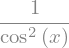

In [27]:
sym.limit((sym.tan(x + y) - sym.tan(x)) / y, y, 0)

Which is equivalent since

$$
\sec(x) = \frac{1}{\cos(x)} and \sec^2(x) = \tan^2(x) + 1.
$$

You can check this as well:

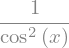

In [28]:
sym.trigsimp(sym.diff(sym.tan(x), x))

Higher derivatives can be calculated using the `diff(func, var, n)` method:

In [29]:
sym.diff(sym.sin(2 * x), x, 1)

In [30]:
sym.diff(sym.sin(2 * x), x, 2)

In [31]:
sym.diff(sym.sin(2 * x), x, 3)

### Series expansion

SymPy also knows how to compute the Taylor series of an expression at
a point. Use `series(expr, var)`:

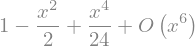

In [32]:
sym.series(sym.cos(x), x)

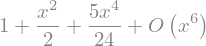

In [33]:
sym.series(1/sym.cos(x), x)

::: {exercise-start}
:label: sympy-lim-deriv-ex
:class: dropdown
:::

1. Calculate $\lim_{x\rightarrow 0} \sin(x)/x$
2. Calculate the derivative of $log(x)$ for $x$.

::: {exercise-end}
:::

::: {index} integration
:::

### Integration

SymPy has support for indefinite and definite integration of transcendental
elementary and special functions via `integrate()` facility, which uses
the powerful extended Risch-Norman algorithm and some heuristics and pattern
matching. You can integrate elementary functions:

In [34]:
sym.integrate(6 * x ** 5, x)

In [35]:
sym.integrate(sym.sin(x), x)

In [36]:
sym.integrate(sym.log(x), x)

In [37]:
sym.integrate(2 * x + sym.sinh(x), x)

Also special functions are handled easily:

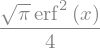

In [38]:
sym.integrate(sym.exp(-x ** 2) * sym.erf(x), x)

It is possible to compute definite integral:

In [39]:
sym.integrate(x**3, (x, -1, 1))

In [40]:
sym.integrate(sym.sin(x), (x, 0, sym.pi / 2))

In [41]:
sym.integrate(sym.cos(x), (x, -sym.pi / 2, sym.pi / 2))

Also improper integrals are supported as well:

In [42]:
sym.integrate(sym.exp(-x), (x, 0, sym.oo))

In [43]:
sym.integrate(sym.exp(-x ** 2), (x, -sym.oo, sym.oo))

::: {index} equations; algebraic, solve
:::

## Equation solving

SymPy is able to solve algebraic equations, in one and several
variables using {func}`~sympy.solveset`:

In [44]:
sym.solveset(x ** 4 - 1, x)

As you can see it takes as first argument an expression that is
supposed to be equaled to 0. It also has (limited) support for transcendental
equations:

In [45]:
sym.solveset(sym.exp(x) + 1, x)

:::{admonition} Systems of linear equations
Sympy is able to solve a large part of
polynomial equations, and is also capable of solving multiple
equations with respect to multiple variables giving a tuple as second
argument. To do this you use the {func}`~sympy.solve` command:

In [46]:
solution = sym.solve((x + 5 * y - 2, -3 * x + 6 * y - 15), (x, y))
solution[x], solution[y]

:::

Another alternative in the case of polynomial equations is
`factor`. `factor` returns the polynomial factorized into irreducible
terms, and is capable of computing the factorization over various
domains:

In [47]:
f = x ** 4 - 3 * x ** 2 + 1
sym.factor(f)

In [48]:
sym.factor(f, modulus=5)

SymPy is also able to solve boolean equations, that is, to decide if a
certain boolean expression is satisfiable or not. For this, we use the
function satisfiable:

In [49]:
sym.satisfiable(x & y)

{y: True, x: True}

This tells us that `(x & y)` is True whenever `x` and `y` are both True.
If an expression cannot be true, i.e. no values of its arguments can make
the expression True, it will return False:

In [50]:
sym.satisfiable(x & ~x)

False

::: {exercise-start}
:label: sympy-solve-roots-ex
:class: dropdown
:::

1. Solve the system of equations $x + y = 2$, $2\cdot x + y = 0$
2. Are there boolean values `x`, `y` that make `(~x | y) & (~y | x)` true?

::: {exercise-end}
:::

## Linear Algebra

:::{index} Matrix
:::

### Matrices

Matrices are created as instances from the Matrix class:

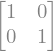

In [51]:
sym.Matrix([[1, 0], [0, 1]])

unlike a NumPy array, you can also put Symbols in it:

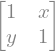

In [52]:
x, y = sym.symbols('x, y')
A = sym.Matrix([[1, x], [y, 1]])
A

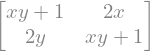

In [53]:
A**2

::: {index} equations; differential, diff, dsolve
:::

### Differential Equations

SymPy is capable of solving (some) Ordinary Differential.
To solve differential equations, use dsolve. First, create
an undefined function by passing cls=Function to the symbols function:

In [54]:
f, g = sym.symbols('f g', cls=sym.Function)

f and g are now undefined functions. We can call f(x), and it will represent
an unknown function:

In [55]:
f(x)

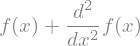

In [56]:
f(x).diff(x, x) + f(x)

In [57]:
sym.dsolve(f(x).diff(x, x) + f(x), f(x))

Keyword arguments can be given to this function in order to help if
find the best possible resolution system. For example, if you know
that it is a separable equations, you can use keyword `hint='separable'`
to force dsolve to resolve it as a separable equation:

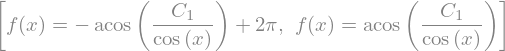

In [58]:
sym.dsolve(sym.sin(x) * sym.cos(f(x)) + sym.cos(x) * sym.sin(f(x)) * f(x).diff(x), f(x), hint='separable')

::: {exercise-start}
:label: sympy-solve-bernoulli
:class: dropdown
:::

1. Solve the Bernoulli differential equation

   $$
   x \frac{d f(x)}{x} + f(x) - f(x)^2=0
   $$

2. Solve the same equation using `hint='Bernoulli'`. What do you observe ?

::: {exercise-end}
:::